In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report,plot_roc_curve
pd.set_option('display.max_columns',25)
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv(r'../input/default-of-credit-card-clients-dataset/UCI_Credit_Card.csv')
data.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
5,6,50000.0,1,1,2,37,0,0,0,0,0,0,64400.0,57069.0,57608.0,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0
6,7,500000.0,1,1,2,29,0,0,0,0,0,0,367965.0,412023.0,445007.0,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0
7,8,100000.0,2,2,2,23,0,-1,-1,0,0,-1,11876.0,380.0,601.0,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0
8,9,140000.0,2,3,1,28,0,0,2,0,0,0,11285.0,14096.0,12108.0,12211.0,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0,0
9,10,20000.0,1,3,2,35,-2,-2,-2,-2,-1,-1,0.0,0.0,0.0,0.0,13007.0,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0,0


In [3]:
data.info()
#info shows that there is no null values and all the features are numeric

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [4]:
data.describe(include='all')

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [5]:
data.rename(columns={'PAY_0':'PAY_1','default.payment.next.month':'def_pay'},inplace=True) 
#rename few columns

In [6]:
# Now we can do EDA

> EDA****

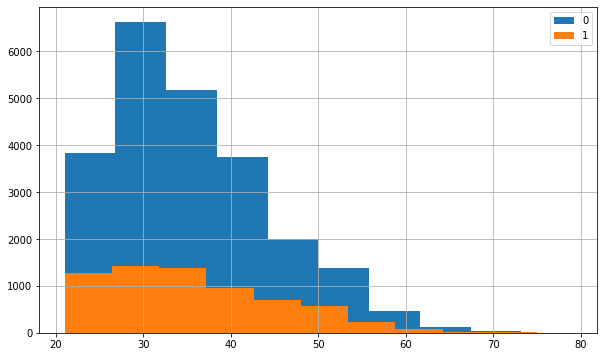

In [7]:
plt.figure(figsize=(10,6))
data.groupby('def_pay')['AGE'].hist(legend=True)
plt.show()
#here we can see that, between age 20 to 45 most of the people will fall into..

Text(0.5, 1.0, 'Age Distribution')

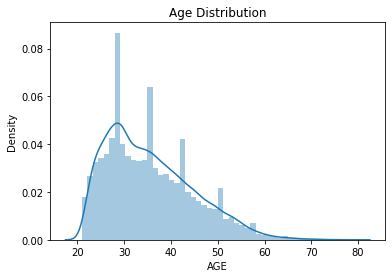

In [8]:
sns.distplot(data['AGE'])
plt.title('Age Distribution')

<AxesSubplot:xlabel='def_pay', ylabel='LIMIT_BAL'>

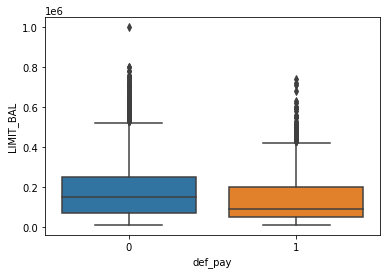

In [9]:
sns.boxplot('def_pay','LIMIT_BAL',data=data)

In [10]:
data[data['LIMIT_BAL']>700000].sort_values(ascending=False,by='LIMIT_BAL')

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
2197,2198,1000000.0,2,1,1,47,0,0,0,-1,0,0,964511.0,983931.0,535020.0,891586.0,927171.0,961664.0,50784.0,50723.0,896040.0,50000.0,50000.0,50256.0,0
18006,18007,800000.0,1,1,2,46,-2,-2,-2,-1,-1,-1,6229.0,4636.0,3810.0,6193.0,1957.0,3175.0,4644.0,3832.0,6219.0,1961.0,3183.0,27201.0,0
14919,14920,800000.0,1,2,1,53,-1,-1,-1,0,0,-1,7639.0,5552.0,64535.0,40814.0,12590.0,9339.0,11145.0,64657.0,131.0,247.0,9366.0,63482.0,0
28715,28716,780000.0,2,2,2,41,-2,-2,-2,-2,-2,-2,101957.0,61715.0,38686.0,21482.0,72628.0,182792.0,62819.0,39558.0,22204.0,82097.0,184322.0,25695.0,0
24320,24321,780000.0,1,1,1,48,0,0,0,0,0,0,171459.0,178587.0,190663.0,195124.0,184872.0,191090.0,10000.0,15004.0,10000.0,8000.0,10028.0,7003.0,0
21375,21376,760000.0,1,3,1,54,0,0,0,0,0,0,447670.0,455970.0,462497.0,469931.0,474421.0,480598.0,20011.0,19500.0,19019.0,18003.0,20000.0,22000.0,0
13186,13187,750000.0,2,1,2,28,1,-1,-1,0,0,-1,9500.0,9655.0,401003.0,399493.0,400993.0,409483.0,250000.0,401003.0,7990.0,11000.0,417990.0,3080.0,0
3733,3734,750000.0,2,2,1,43,-1,-1,-1,-2,-1,-1,72495.0,99628.0,74635.0,63749.0,85067.0,83208.0,99664.0,74640.0,63758.0,85072.0,83215.0,124063.0,0
10089,10090,750000.0,2,1,1,41,0,0,0,0,-1,-1,184022.0,163441.0,92767.0,75696.0,35485.0,4889.0,6817.0,2330.0,2705.0,50854.0,4913.0,550.0,0
4603,4604,750000.0,2,3,1,40,-2,-2,-1,-1,-1,-1,16372.0,15344.0,3329.0,38488.0,9777.0,66692.0,15420.0,3691.0,38679.0,9825.0,67024.0,76641.0,0


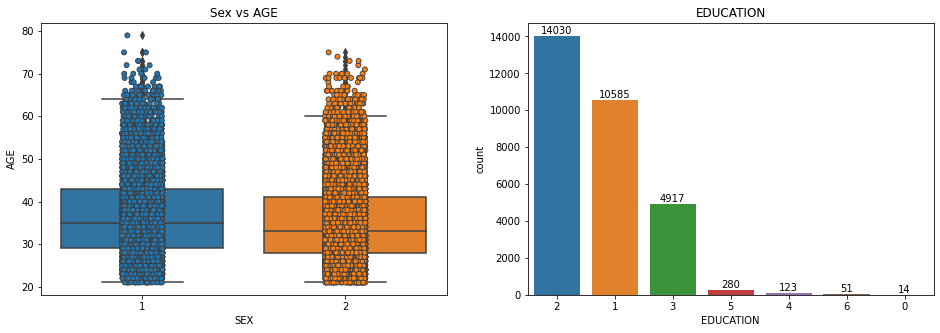

In [11]:
plt.figure(figsize=(16,5))
plt.subplot(121)
sns.boxplot(x='SEX', y= 'AGE',data = data)
sns.stripplot(x='SEX', y= 'AGE',data = data,linewidth = 0.9)
plt.title ('Sex vs AGE')

plt.subplot(122)
ax = sns.countplot(x='EDUCATION',data = data,  order= data['EDUCATION'].value_counts().index)
plt.title ('EDUCATION')
labels = data['EDUCATION'].value_counts()
for i, v in enumerate(labels):
    ax.text(i,v+100,v, horizontalalignment='center')
plt.show()

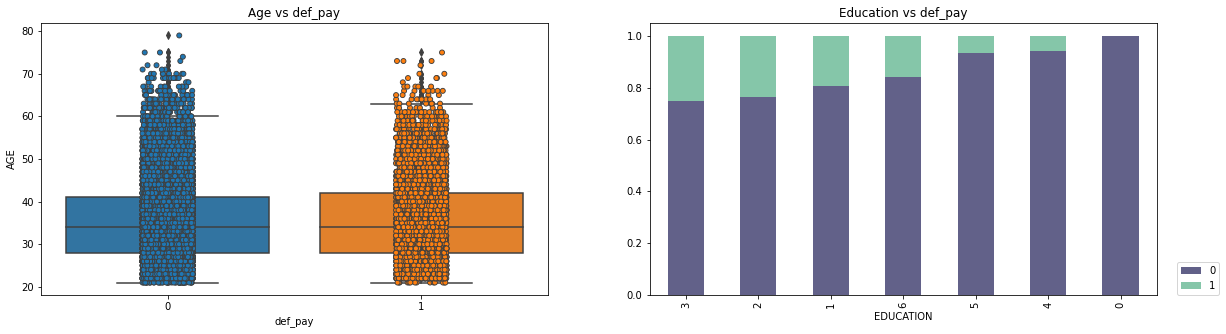

In [12]:
# comparing def_pay with Age and Education
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='def_pay', y= 'AGE',data = data)
sns.stripplot(x='def_pay', y= 'AGE',data = data,linewidth = 0.9)
plt.title ('Age vs def_pay')

ax2=plt.subplot(1,2,2)
pay_edu = data.groupby('EDUCATION')['def_pay'].value_counts(normalize=True).unstack()
pay_edu = pay_edu.sort_values(ascending=False,by=1)
pay_edu.plot(kind='bar',stacked= True,color=["#3f3e6fd1", "#85c6a9"], ax = ax2)
plt.legend(loc=(1.04,0))
plt.title('Education vs def_pay')
plt.show()

In [13]:
# Creating a function for visualising three features
def plotfig(df1,col11,col22,deft1):
    plt.figure(figsize=(16,6))

    plt.subplot(121)
    sns.pointplot(df1[col11], df1[deft1],hue = df1[col22])

    plt.subplot(122)
    sns.countplot(df1[col11], hue = df1[col22])
    plt.show() 


def varplot(df2, col1, col2, deft, bin=3, unique=10):
    df=df2.copy()
    if len(df[col1].unique())>unique:
        df[col1+'cut']= pd.qcut(df[col1],bin)
        if len(df[col2].unique())>unique:
            df[col2+'cut']= pd.qcut(df[col2],bin)
            return plotfig(df,col1+'cut',col2+'cut',deft)
        else:
            df[col2+'cut']= df[col2]
            return plotfig(df,col1+'cut',col2+'cut',deft)
    else:
        return plotfig(df,col1,col2,deft)

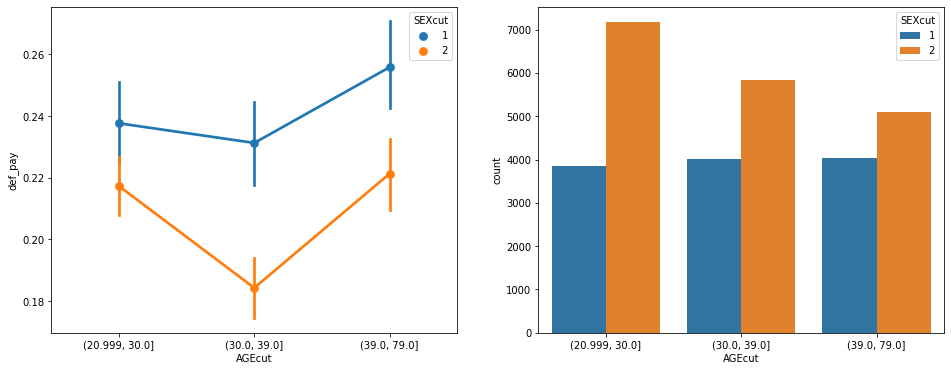

In [14]:
varplot(data,'AGE','SEX','def_pay',3)

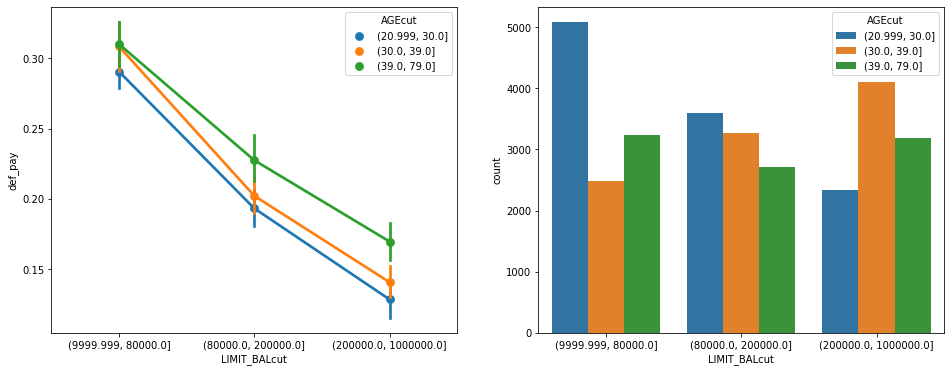

In [15]:
varplot(data,'LIMIT_BAL','AGE','def_pay',3)

In [16]:
# from the above,we can see that we have maximum clients from 20-30 age group followed by 31-40. 
# Hence with increasing age group the number of clients that will default the payment next month is decreasing. 
#  Hence we can see that Age is important feature to predict the default payment for next month.

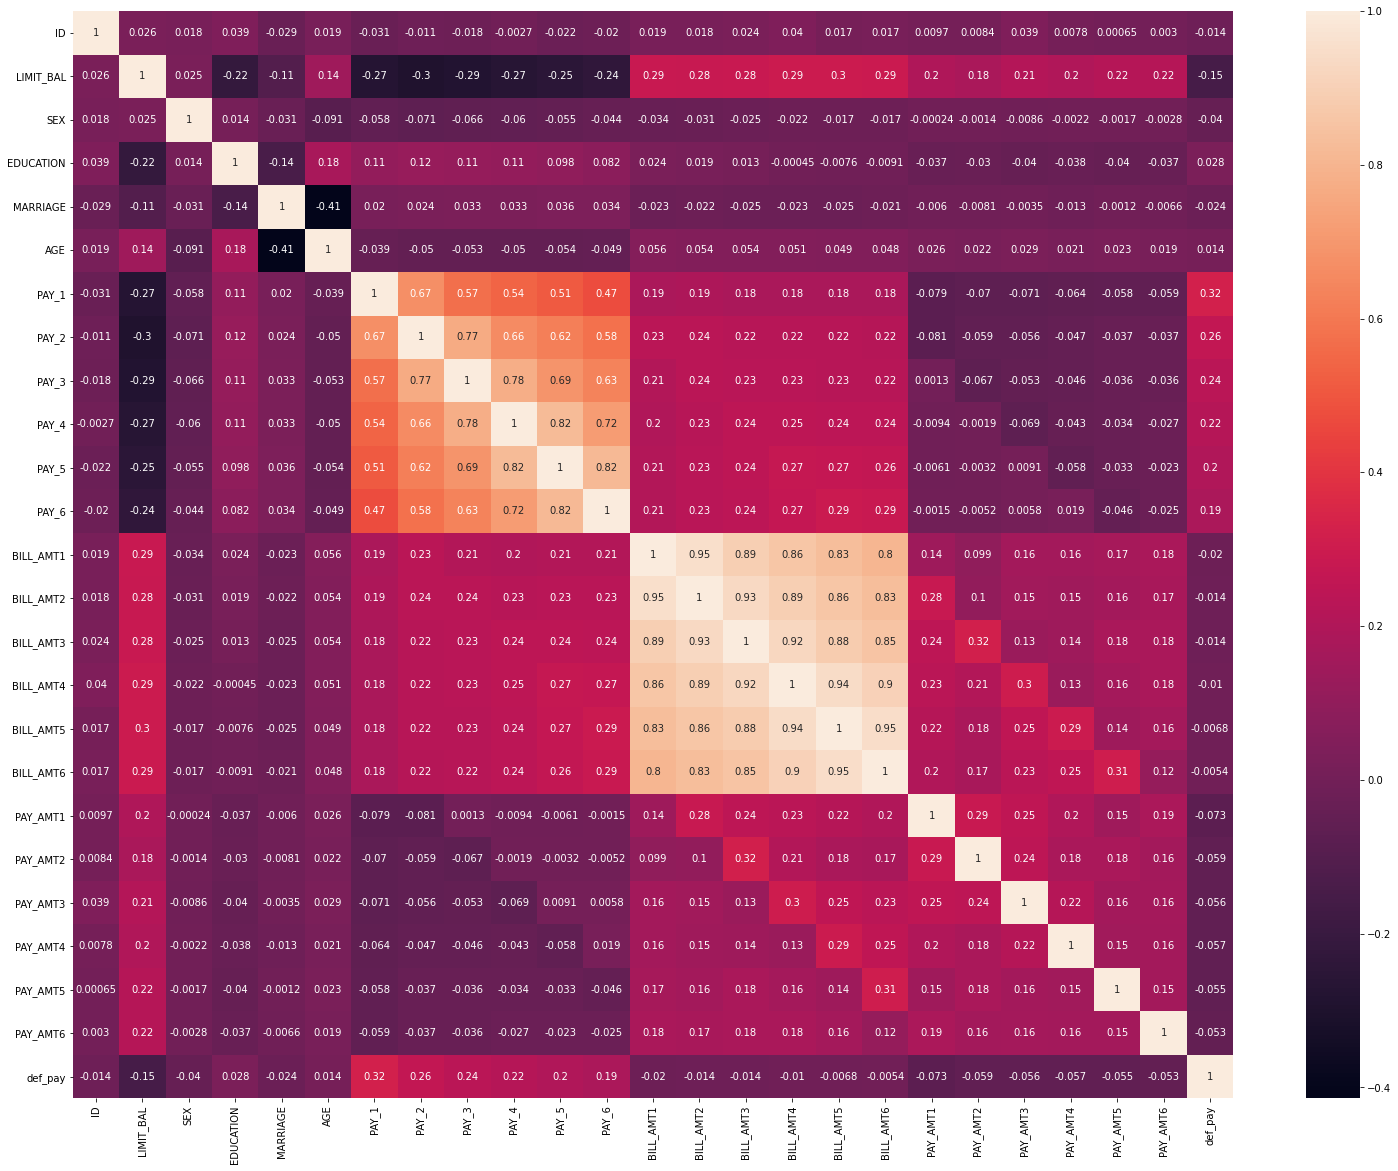

In [17]:
plt.subplots(figsize=(26,20))
corr = data.corr()
sns.heatmap(corr,annot=True)
plt.show()

In [18]:
# From this heatmap we can see that there are some multicolinearity in the data which we can handle while building the model
# Now we just focus on the significant features

In [19]:
# we can create a new dataset with all the features have collinearity with each other and see what we can..
bill_tot = pd.DataFrame(data['BILL_AMT1']+data['BILL_AMT2']+data['BILL_AMT3']+data['BILL_AMT4']+data['BILL_AMT5']+data['BILL_AMT6'],columns=['bill_tot'])
pay_tot =pd.DataFrame(data['PAY_1']+data['PAY_2']+data['PAY_3']+data['PAY_4']+data['PAY_5']+data['PAY_6'],columns=['pay_tot'])
pay_amt_tot = pd.DataFrame(data['PAY_AMT1']+data['PAY_AMT2']+data['PAY_AMT3']+data['PAY_AMT4']+data['PAY_AMT5']+data['PAY_AMT6'],columns=['pay_amt_tot'])
frames=[bill_tot,pay_tot,pay_amt_tot,data['def_pay']]
tot = pd.concat(frames,axis=1)

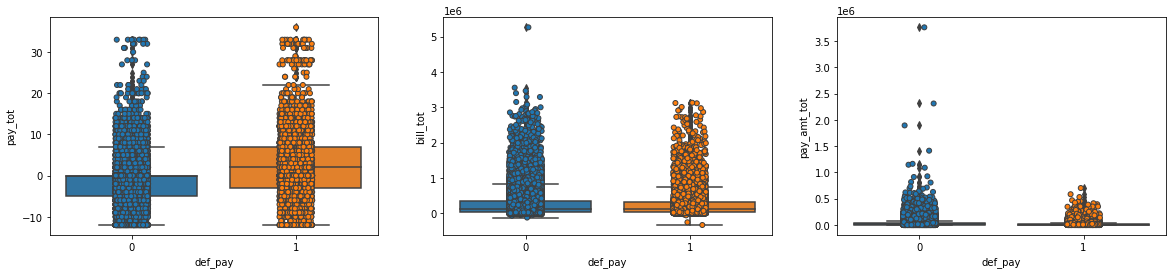

In [20]:
plt.figure(figsize=(20,4))
plt.subplot(131)
sns.boxplot(x='def_pay',y='pay_tot',data = tot)
sns.stripplot(x='def_pay',y='pay_tot',data = tot,linewidth=1)

plt.subplot(132)
sns.boxplot(x='def_pay', y='bill_tot',data=tot)
sns.stripplot(x='def_pay', y='bill_tot',data=tot,linewidth=1)

plt.subplot(133)
sns.boxplot(x='def_pay', y='pay_amt_tot',data=tot)
sns.stripplot(x='def_pay', y='pay_amt_tot',data=tot,linewidth=1)
plt.show()

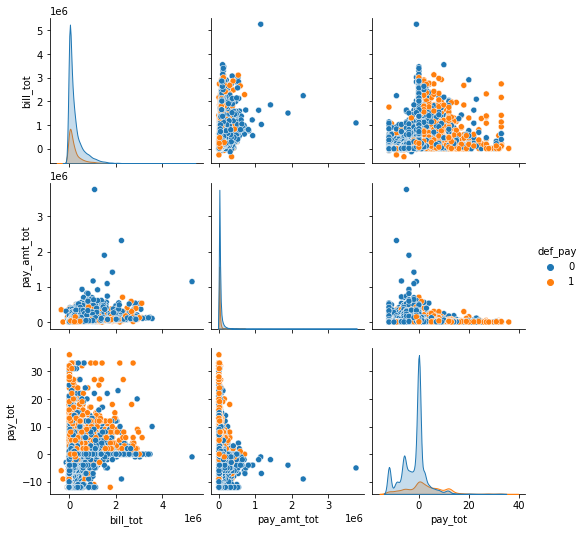

In [21]:
sns.pairplot(tot[['bill_tot','pay_amt_tot','pay_tot','def_pay']],hue='def_pay')
plt.show()

<AxesSubplot:xlabel='def_pay', ylabel='bill_tot'>

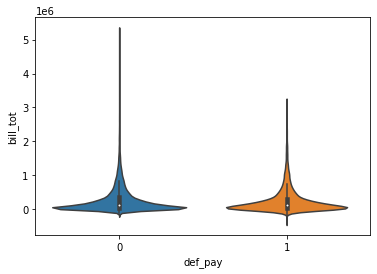

In [22]:
sns.violinplot(x=tot['def_pay'], y= tot['bill_tot'])

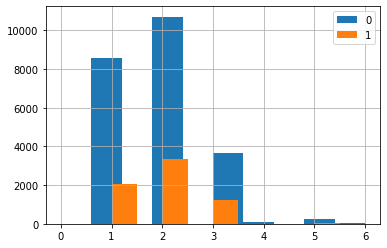

In [23]:
data.groupby('def_pay')['EDUCATION'].hist(legend=True)
plt.show()

<Figure size 864x432 with 0 Axes>

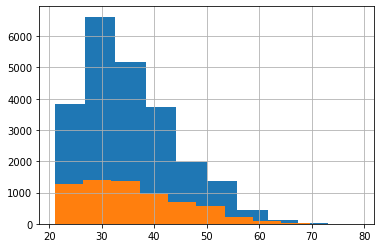

<Figure size 864x432 with 0 Axes>

In [24]:
data.groupby('def_pay')['AGE'].hist()
plt.figure(figsize=(12,6))

In [25]:
# using the above plot we can create age bins
age = [20,27,32,37,42,48,58,64,80]
lab = [8,7,6,5,4,3,2,1]
data['AGE'] = pd.cut(data['AGE'],bins= age,labels=lab)

<Figure size 864x432 with 0 Axes>

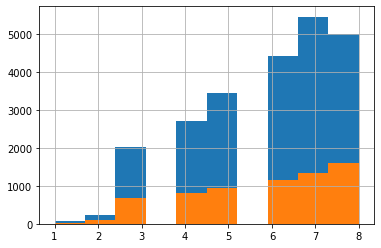

<Figure size 864x432 with 0 Axes>

In [26]:
data.groupby('def_pay')['AGE'].hist()
plt.figure(figsize=(12,6))

<AxesSubplot:xlabel='AGE', ylabel='count'>

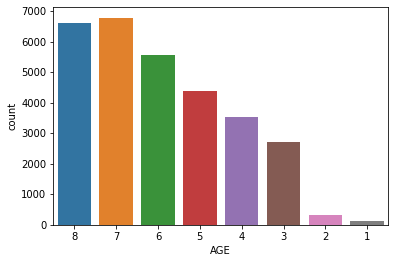

In [27]:
sns.countplot(data['AGE'])

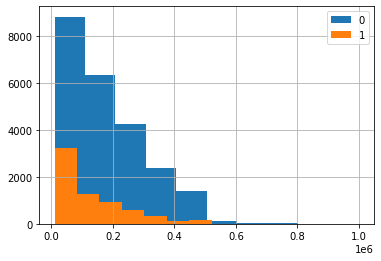

In [28]:
data.groupby('def_pay')['LIMIT_BAL'].hist(legend=True)
plt.show()

In [29]:
# spliting the dataset and standardizing it..
x= data.drop(['def_pay','ID' ],1)
y = data['def_pay']
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size=0.20, random_state=1)
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [30]:
# creating funtion to view confusion matrix as well as the report...
def res(y_valid):
    cm_log = confusion_matrix(y_test,y_valid)
    ConfusionMatrixDisplay(cm_log).plot()
    print(classification_report(y_test,y_valid))

              precision    recall  f1-score   support

           0       0.81      0.98      0.89      4663
           1       0.72      0.22      0.34      1337

    accuracy                           0.81      6000
   macro avg       0.77      0.60      0.61      6000
weighted avg       0.79      0.81      0.76      6000



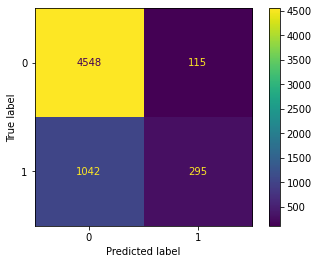

In [31]:
log_model= LogisticRegression()
log_model.fit(x_train,y_train)
y_pred_log = log_model.predict(x_test)
res(y_pred_log)

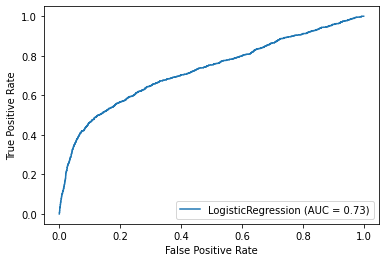

In [32]:
plot_roc_curve(log_model,x_test,y_test)
plt.show()

              precision    recall  f1-score   support

           0       0.85      0.93      0.89      4663
           1       0.63      0.41      0.50      1337

    accuracy                           0.82      6000
   macro avg       0.74      0.67      0.69      6000
weighted avg       0.80      0.82      0.80      6000



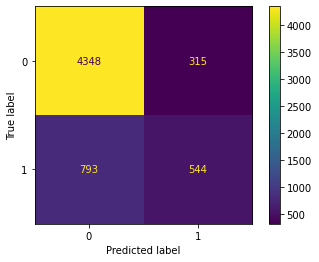

In [33]:
threshold = 0.36
y_log_prob =  log_model.predict_proba(x_test)
y_log_prob=y_log_prob[:,1]
y_pred_log_prob = np.where(y_log_prob>threshold,1,0)
res(y_pred_log_prob)

              precision    recall  f1-score   support

           0       0.83      0.82      0.83      4663
           1       0.41      0.42      0.41      1337

    accuracy                           0.73      6000
   macro avg       0.62      0.62      0.62      6000
weighted avg       0.74      0.73      0.74      6000



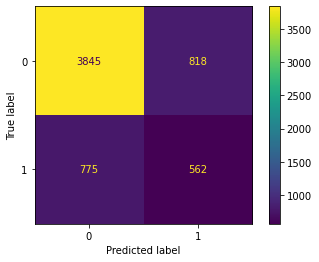

In [34]:
dec_model = DecisionTreeClassifier()
dec_model.fit(x_train,y_train)
y_pred_dec = dec_model.predict(x_test)
res(y_pred_dec)

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4663
           1       0.64      0.36      0.46      1337

    accuracy                           0.81      6000
   macro avg       0.74      0.65      0.67      6000
weighted avg       0.79      0.81      0.79      6000



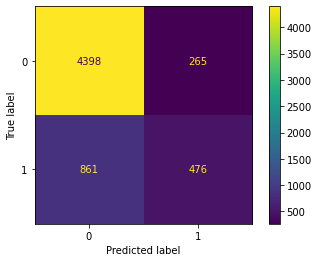

In [35]:
rf_model = RandomForestClassifier()
rf_model.fit(x_train,y_train)
y_pred_rf = rf_model.predict(x_test)
res(y_pred_rf)

In [36]:
parameters = {'n_estimators':[70,80]}
clf = GridSearchCV(rf_model, parameters)
clf.fit(x_train,y_train)
clf.best_params_

{'n_estimators': 70}

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4663
           1       0.65      0.35      0.46      1337

    accuracy                           0.81      6000
   macro avg       0.74      0.65      0.67      6000
weighted avg       0.80      0.81      0.79      6000



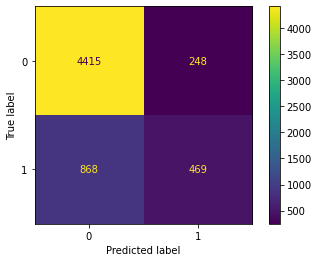

In [37]:
rf_model = RandomForestClassifier(n_estimators=80)
rf_model.fit(x_train,y_train)
y_pred_rf = rf_model.predict(x_test)
res(y_pred_rf)

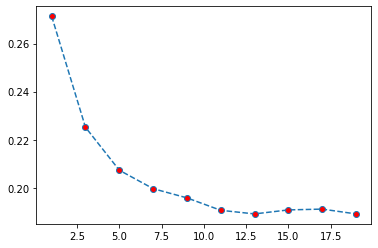

In [38]:
# now using KNN model
error = []

for i in range(1,21,2):
    knn =  KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    preds = knn.predict(x_test)
    error.append(np.mean(preds!=y_test))

plt.plot(range(1,21,2), error, linestyle = 'dashed', marker ='o', mfc= 'red')

              precision    recall  f1-score   support

           0       0.83      0.92      0.87      4663
           1       0.56      0.34      0.42      1337

    accuracy                           0.79      6000
   macro avg       0.69      0.63      0.65      6000
weighted avg       0.77      0.79      0.77      6000



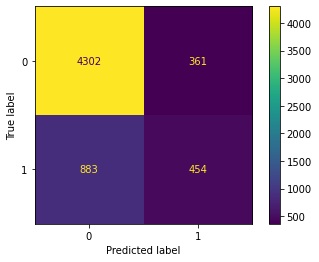

In [39]:
# By using the elbow graph we can see that the k=5 will perform better in the first place so impute k = 5
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train,y_train)
y_pred_knn = knn_model.predict(x_test)
res(y_pred_knn)

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      4663
           1       0.69      0.33      0.44      1337

    accuracy                           0.82      6000
   macro avg       0.76      0.64      0.67      6000
weighted avg       0.80      0.82      0.79      6000



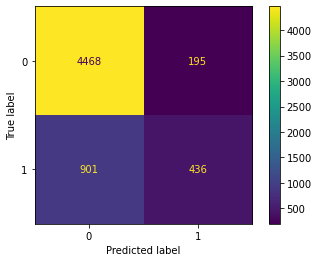

In [40]:
# now using SVM
svm_model = SVC()
svm_model.fit(x_train,y_train)
y_pred_svm = svm_model.predict(x_test)
res(y_pred_svm)

              precision    recall  f1-score   support

           0       0.88      0.78      0.83      4663
           1       0.45      0.62      0.52      1337

    accuracy                           0.74      6000
   macro avg       0.66      0.70      0.67      6000
weighted avg       0.78      0.74      0.76      6000



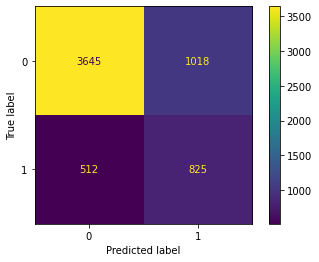

In [41]:
# now using Naive Bayes
nb_model = GaussianNB()
nb_model.fit(x_train,y_train)
y_pred_nb = nb_model.predict(x_test)
res(y_pred_nb)

In [42]:
## using SMOTE we are creating clones of y due less number of samples for 1 in it....

In [43]:
x= data.drop(['def_pay','ID' ],1)
y = data['def_pay']
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size=0.20, random_state=1)
print(np.mean(y_train==0))
print(np.mean(y_train==1))
print(len(y_train))

0.7792083333333333
0.22079166666666666
24000


In [44]:
smote = SMOTE()
x_train, y_train = smote.fit_resample(x_train,y_train)
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
print(np.mean(y_train==0))
print(np.mean(y_train==1))
print(len(y_train))

0.5
0.5
37402


In [45]:
x_train=pd.DataFrame(x_train).fillna(0)

              precision    recall  f1-score   support

           0       0.86      0.73      0.79      4663
           1       0.38      0.58      0.46      1337

    accuracy                           0.69      6000
   macro avg       0.62      0.65      0.62      6000
weighted avg       0.75      0.69      0.71      6000



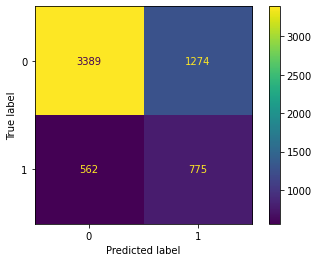

In [46]:
log_model= LogisticRegression()
log_model.fit(x_train,y_train)
y_pred_log = log_model.predict(x_test)
res(y_pred_log)

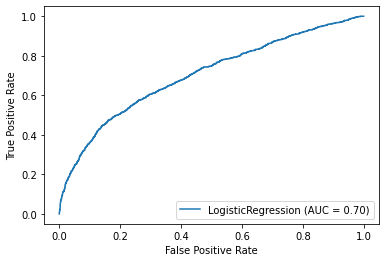

In [47]:
plot_roc_curve(log_model,x_test,y_test)
plt.show()

              precision    recall  f1-score   support

           0       0.86      0.67      0.75      4663
           1       0.35      0.63      0.45      1337

    accuracy                           0.66      6000
   macro avg       0.61      0.65      0.60      6000
weighted avg       0.75      0.66      0.69      6000



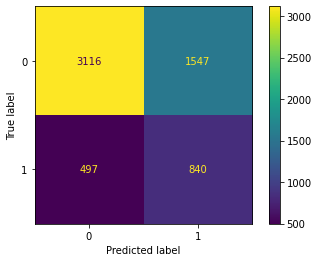

In [48]:
threshold = 0.46
y_log_prob =  log_model.predict_proba(x_test)
y_log_prob=y_log_prob[:,1]
y_pred_log_prob = np.where(y_log_prob>threshold,1,0)
res(y_pred_log_prob)